**Problem Statement:**

Predicting the sale prices of houses based on the features like Area, No. of Bedrooms, Connection to Main Roads, and many more.

**Dataset:** 

The dataset used for the estimation of Housing Prices is titled as "Housing.csv".

**Features:**

* Area: Area of the house in square-feet. 
* Bedrooms: No. of bedrooms ranging between 1 to 6.
* Bathrooms: No. of bathrooms ranging between 1 to 4.
* Stories: No. of levels the house have ranging between 1 to 4.
* Mainroad: Connections to the MainRoad (Yes/No).
* Guestroom: Availability of Guest Rooms (Yes/No).
* Basement: Facility of Basement (Yes/No).
* Hotwater heating: Availabilty of Hot-Water (Yes/No).
* Airconditioning: Yes/No
* Parking: No.of Parking available in the range of 0 to 3. 
* Prefarea: Yes/No
* Furnishing status: Whether the house is Furnished or Semi-Furnished or Un-Furnished.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Modelling Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("./Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Basic EDA

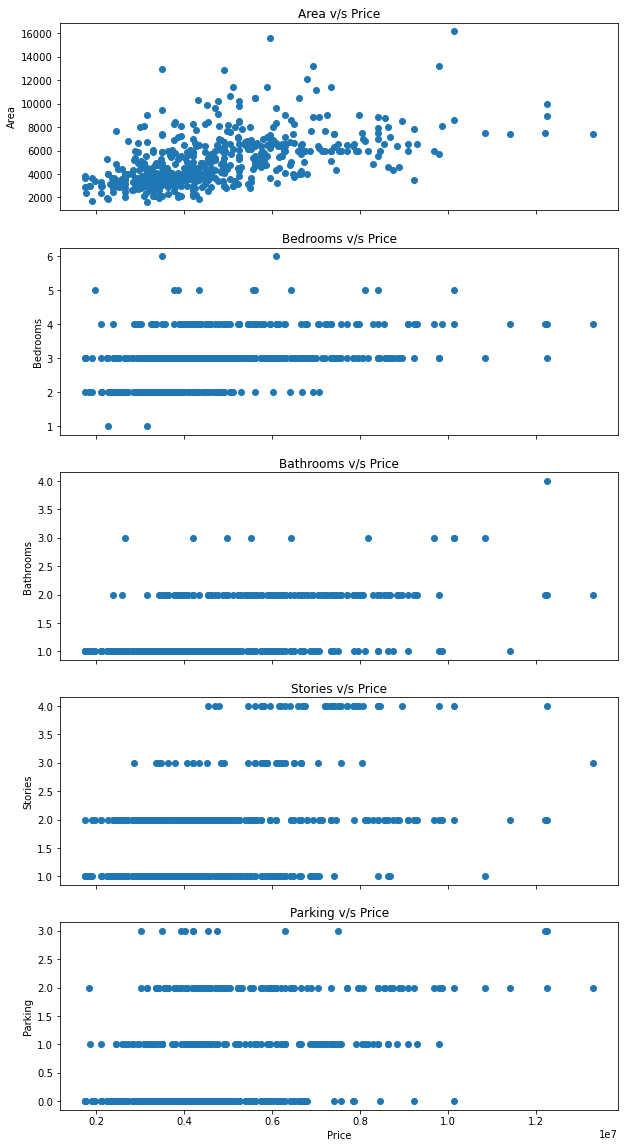

In [5]:
fig,ax = plt.subplots(5,1,figsize=(10,20),sharex=True)
ax[0].scatter(x=df.price,y=df.area,label="Area")
ax[0].set_ylabel("Area")
ax[0].set_title("Area v/s Price")

ax[1].scatter(x=df.price,y=df.bedrooms,label="Bedrooms")
ax[1].set_ylabel("Bedrooms")
ax[1].set_title("Bedrooms v/s Price")

ax[2].scatter(x=df.price,y=df.bathrooms,label="Bathrooms")
ax[2].set_ylabel("Bathrooms")
ax[2].set_title("Bathrooms v/s Price")

ax[3].scatter(x=df.price,y=df.stories,label="Stories")
ax[3].set_ylabel("Stories")
ax[3].set_title("Stories v/s Price")

ax[4].scatter(x=df.price,y=df.parking,label="Parking");
ax[4].set_ylabel("Parking")
ax[4].set_title("Parking v/s Price")
ax[4].set_xlabel("Price");

1. In context to Area v/s Price Plot: it is clearly seen that most of the houses are in the mid-range of Area [2000-1000] in the low price range.


2. Houses having 3 & 4 bedrooms are more in demand.


3. Customers are more likely to choose those houses which are having atleast 2 bathrooms.


4. The demand for double-storeyed houses are on peak


5. Parking options of 1 & 2 are more likely to be choosed by customers concerning to House.

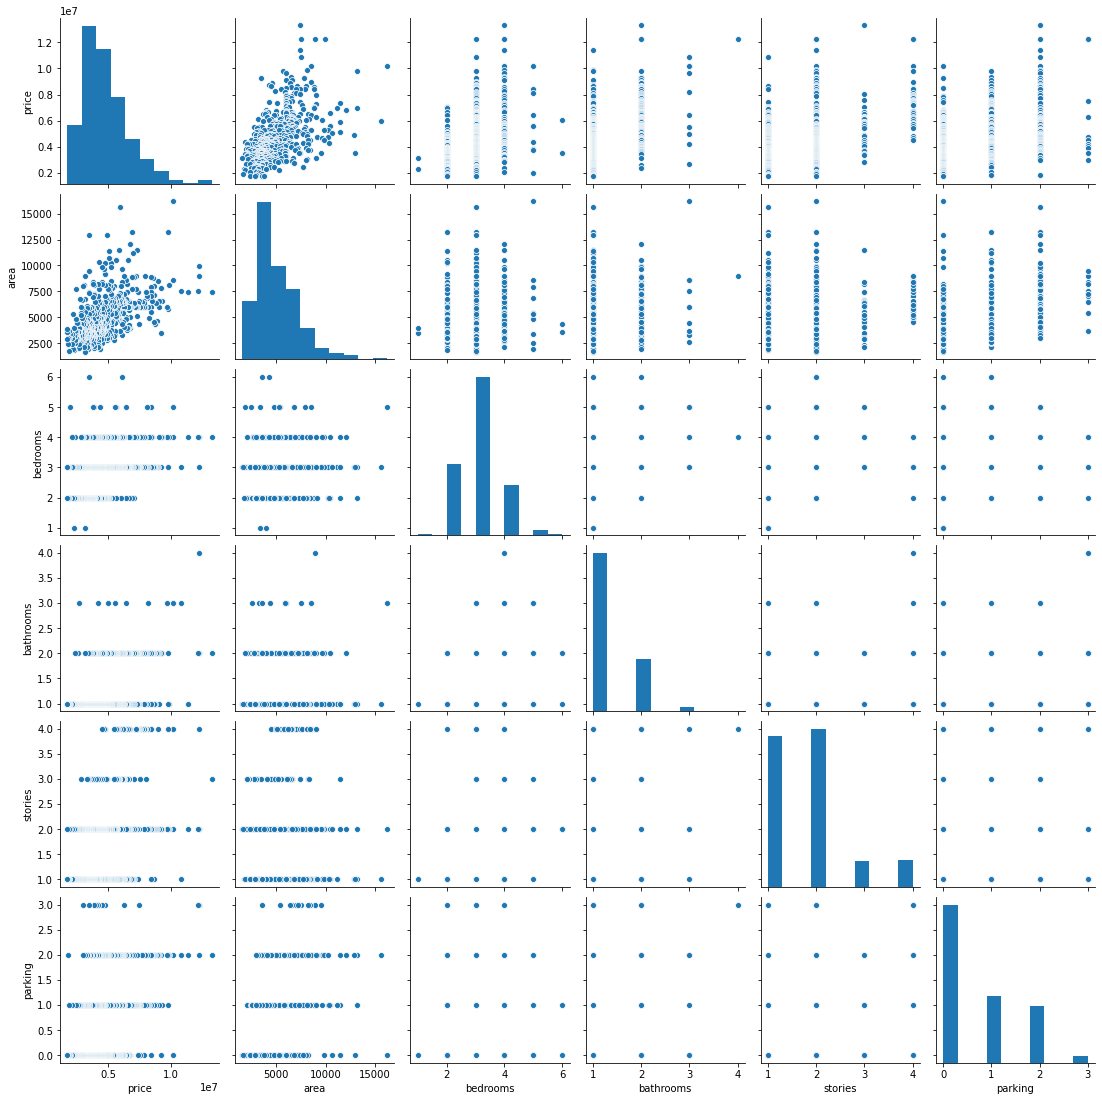

In [6]:
sns.pairplot(df);

In [7]:
X = df.drop("price",axis=1)
y = df.price

In [8]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((436, 12), (109, 12), (436,), (109,))

In [11]:
# Check for missing values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

> Since our Dataset does not contain any Null values, it is clean. But there are many categorical features which contains values as Yes/No. So applying OneHotEncoder to convert strings to numbers to pass the numerical features into the model.

In [12]:
cat_features=[]
for name,content in df.items():
    if pd.api.types.is_string_dtype (content):
        cat_features.append(name)
print(cat_features)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [13]:
onehot=OneHotEncoder()
transformer = ColumnTransformer([("onehot",onehot,cat_features)],remainder="passthrough")
conv_X_train = transformer.fit_transform(X_train)
conv_X_test = transformer.transform(X_test)

In [14]:
train_df = pd.DataFrame(conv_X_train)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3480.0,3.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2970.0,3.0,1.0,3.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4075.0,3.0,1.0,1.0,2.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4500.0,2.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3700.0,4.0,1.0,2.0,0.0


In [15]:
test_df = pd.DataFrame(conv_X_test)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,12900.0,3.0,1.0,1.0,2.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3180.0,2.0,2.0,1.0,2.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3800.0,2.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,6000.0,3.0,2.0,4.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,10240.0,2.0,1.0,1.0,2.0


In [16]:
train_df.shape,test_df.shape

((436, 20), (109, 20))

In [17]:
model1 = LinearRegression()
model2 = Ridge()

In [18]:
def evaluate_r2_score(X_train,X_test,y_train,y_test):
    model1.fit(X_train,y_train)
    model2.fit(X_train,y_train)
    preds1 = model1.predict(X_test)
    preds2 = model2.predict(X_test)
    return r2_score(y_test,preds1),r2_score(y_test,preds2)

In [19]:
evaluate_r2_score(train_df,test_df,y_train,y_test)

(0.7004237757908591, 0.7002913033105621)

**The accuracy using the Linear Regression Model comes out to be `70.04 %` and in the case of Ridge Regression Model it is around `70.02%`**